# Análisis Exploratorio de Datos 

## 1. Introducción

Este notebook realiza un **análisis exploratorio básico** utilizando el dataset **Life Expectancy Data**, 
con enfoque en responder la pregunta:

### **“¿Por qué Costa Rica tiene mayor esperanza de vida que Panamá?”**

---

## 2. Problemática

### Problema global
La esperanza de vida varía significativamente entre países debido a factores como:
- Acceso desigual a servicios de salud  
- Diferentes niveles de educación  
- Cobertura de vacunación  
- Diferencias económicas  
- Condiciones sociales y medioambientales

El ODS 3 evidencia que estas desigualdades afectan directamente la calidad y duración de la vida.

### Problema local (Panamá / región)

En Latinoamérica y específicamente en Panamá, existen brechas entre:
- Zonas urbanas y rurales  
- Acceso a servicios de salud  
- Niveles de escolaridad  
- Ingresos y condiciones económicas  

Esto genera disparidades claras en la esperanza de vida.

### ¿Por qué necesitamos datos?
Porque existe un vacío de información clara que relacione **qué factores** influyen más en la esperanza de vida 
y qué tan grande es su impacto.

El análisis permitirá identificar:
- Qué está fallando  
- Qué funciona  
- Dónde enfocar recursos y políticas públicas


 # ====================================================== 
  # 1. IMPORTAR LIBRERÍAS
 # ======================================================

In [1]:


import pandas as pd                   # Para manejar y analizar datos en tablas (DataFrames)
import numpy as np                    # Para operaciones matemáticas y matrices
import matplotlib.pyplot as plt       # Para crear gráficos básicos
import seaborn as sns                 # Para gráficos estadísticos más avanzados y estéticos

# Configuración de estilo de los gráficos

sns.set_style("whitegrid")

# Mostrar todas las columnas de los DataFrames al imprimir

pd.set_option("display.max_columns", None)


# ======================================================
# 2. CARGAR DATASET
# ======================================================

In [4]:
# Cargar el archivo CSV en un DataFrame de pandas

df = pd.read_csv("DatosODS3_0.csv")

# Eliminar espacios extra en los nombres de columnas

df.columns = df.columns.str.strip()

# Mostrar las primeras filas para verificar que se cargó correctamente

df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# ======================================================
# 3. FILTRAR LOS PAÍSES DE INTERÉS
# ======================================================

In [5]:

countries = ["Costa Rica", "Panama"]

# Filtrar solo las filas correspondientes a los países seleccionados

df_ca = df[df["Country"].isin(countries)].copy()

df_ca.head()  # Mostrar las primeras filas del DataFrame filtrado



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
625,Costa Rica,2015,Developing,79.6,95.0,1,NaN,0.000000,92.0,0,6.5,1,92.0,NaN,92.0,0.1,1146.36273,487852.0,1.7,1.7,0.775,14.2
626,Costa Rica,2014,Developing,79.5,96.0,1,3.45,384.512914,91.0,1,59.5,1,91.0,9.31,91.0,0.1,1647.44179,4757575.0,1.7,1.7,0.768,13.9
627,Costa Rica,2013,Developing,79.4,96.0,1,3.42,386.137912,94.0,0,58.5,1,95.0,9.47,95.0,0.1,1569.66631,47641.0,1.7,1.7,0.762,13.7
628,Costa Rica,2012,Developing,79.2,97.0,1,3.34,2568.237059,91.0,0,57.5,1,9.0,9.56,91.0,0.1,9985.36959,4654122.0,1.8,1.7,0.758,13.6
629,Costa Rica,2011,Developing,79.0,98.0,1,3.41,2429.854745,84.0,0,56.5,1,82.0,9.73,85.0,0.1,9186.59639,46474.0,1.8,1.7,0.752,13.4


# ======================================================
# 4. LIMPIEZA DE DATOS
# ======================================================

In [6]:

numeric_cols = [
    "Year","Life expectancy","Adult Mortality","infant deaths","Alcohol",
    "percentage expenditure","Hepatitis B","Measles","BMI","under-five deaths",
    "Polio","Total expenditure","Diphtheria","HIV/AIDS","GDP","Population",
    "thinness  1-19 years","thinness 5-9 years",
    "Income composition of resources","Schooling"
]

# Convertir las columnas numéricas a tipo float/int, forzando NaN donde no se pueda

df_ca[numeric_cols] = df_ca[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Rellenar valores faltantes (NaN) con la media del país correspondiente
# Esto evita que los datos incompletos afecten los análisis estadísticos

df_ca[numeric_cols] = df_ca.groupby("Country")[numeric_cols].transform(lambda x: x.fillna(x.mean()))

# Revisar si todavía hay valores faltantes

df_ca.isna().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# ======================================================
# 5. ESTADÍSTICA DESCRIPTIVA
# ======================================================

In [7]:

# Generar resumen estadístico (media, mediana, desviación, etc.) para variables clave

df_ca.groupby("Country")[["Life expectancy","GDP","Schooling"]].describe()


Life expectancy                                                   \
                     count      mean       std   min     25%    50%     75%   
Country                                                                       
Costa Rica            16.0  78.59375  0.711307  77.5  78.000  78.75  79.200   
Panama                16.0  76.48750  0.794879  75.5  75.775  76.45  77.225   

                   GDP                                                     \
             max count         mean          std         min          25%   
Country                                                                     
Costa Rica  79.6  16.0  3957.227286  3251.984131  388.363689  1032.121104   
Panama      77.8  16.0  5417.768890  4305.132732   46.299350  1424.301140   

                                                  Schooling           \
                    50%          75%          max     count     mean   
Country                                                                
Costa Rica  4074.621320  5661.674563   9985.36959      16.0  12.8375   
Panama      4754.220818  7556.536188  13134.43670      16.0  12.7750   

                                                        
                 std   min     25%    50%    75%   max  
Country                                                 
Costa Rica  0.809012  11.6  12.175  12.85  13.45  14.2  
Panama      0.232379  12.1  12.800  12.80  12.90  13.0

# ======================================================
# 6. COMPARACIONES NUMÉRICAS
# ======================================================

In [8]:

# Medianas de esperanza de vida, GDP y escolaridad por país

medians = df_ca.groupby("Country")[["Life expectancy","GDP","Schooling"]].median()

# Media de la esperanza de vida por país

means = df_ca.groupby("Country")["Life expectancy"].mean()

# Mostrar resultados

medians, means


(            Life expectancy          GDP  Schooling
 Country                                            
 Costa Rica            78.75  4074.621320      12.85
 Panama                76.45  4754.220818      12.80,
 Country
 Costa Rica    78.59375
 Panama        76.48750
 Name: Life expectancy, dtype: float64)

# ======================================================
# 7. TENDENCIA DE ESPERANZA DE VIDA
# ======================================================

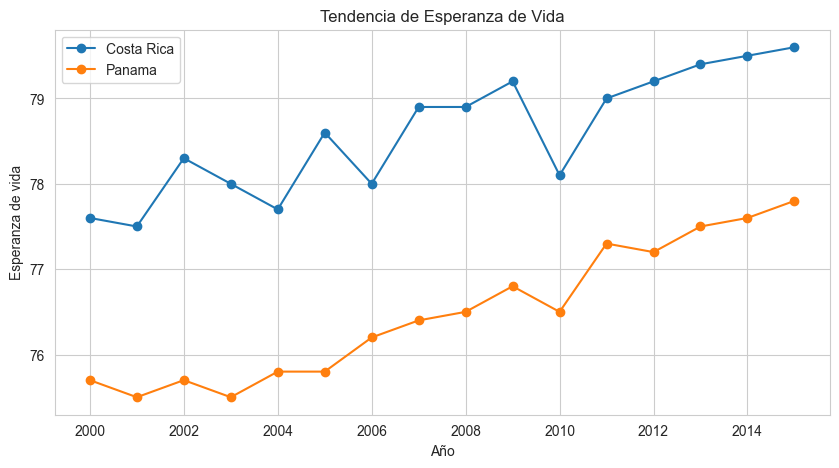

In [9]:

plt.figure(figsize=(10,5))

for country in countries:
    # Filtrar los datos del país actual

    subset = df_ca[df_ca["Country"] == country]

    # Graficar línea de esperanza de vida a lo largo de los años
    
    plt.plot(subset["Year"], subset["Life expectancy"], marker="o", label=country)

plt.title("Tendencia de Esperanza de Vida")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida")
plt.legend()
plt.show()


# ======================================================
# 8. MATRIZ DE CORRELACIÓN
# ======================================================

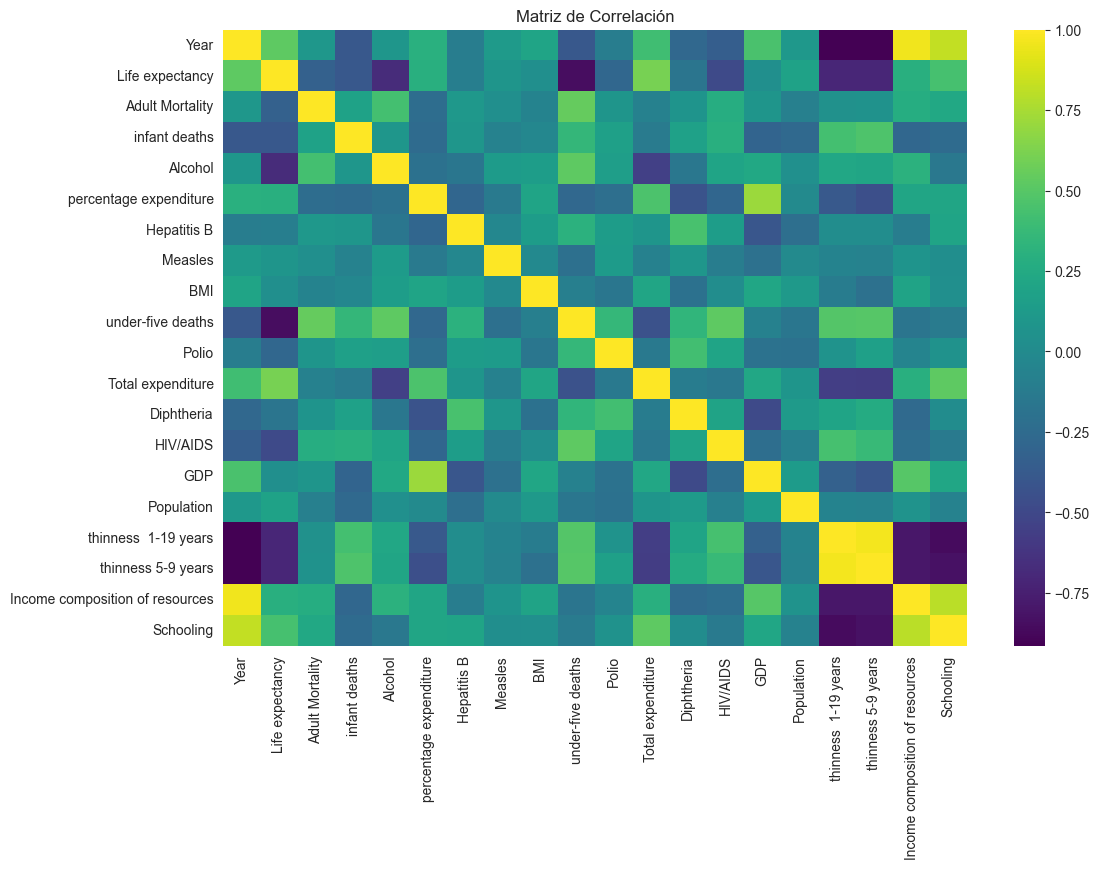

In [10]:

plt.figure(figsize=(12,8))

# Correlación entre todas las variables numéricas
# Permite ver qué factores están relacionados con la esperanza de vida

sns.heatmap(df_ca[numeric_cols].corr(), cmap="viridis")
plt.title("Matriz de Correlación")
plt.show()


# ======================================================
# 9. VACUNACIÓN PROMEDIO
# ======================================================

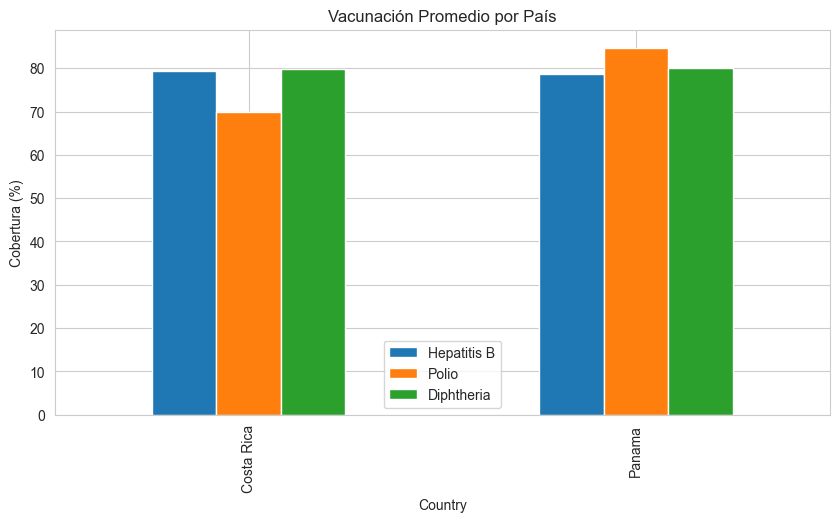

In [11]:

vac_cols = ["Hepatitis B", "Polio", "Diphtheria"]

# Calcular promedio de vacunación por país

df_vac = df_ca.groupby("Country")[vac_cols].mean()

# Graficar barras de cobertura de vacunación

df_vac.plot(kind="bar", figsize=(10,5))
plt.title("Vacunación Promedio por País")
plt.ylabel("Cobertura (%)")
plt.show()


# ======================================================
# 10. EDUCACIÓN VS ESPERANZA DE VIDA
# ======================================================

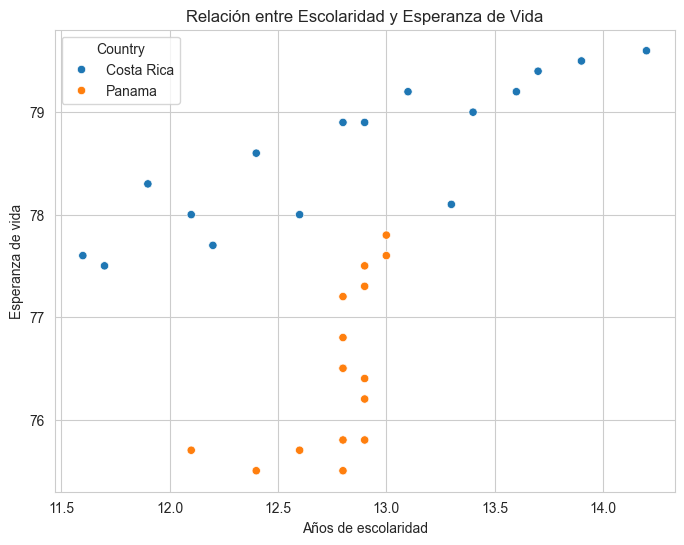

In [12]:

plt.figure(figsize=(8,6))

# Gráfico de dispersión: relación entre escolaridad y esperanza de vida

sns.scatterplot(data=df_ca, x="Schooling", y="Life expectancy", hue="Country")

plt.title("Relación entre Escolaridad y Esperanza de Vida")
plt.xlabel("Años de escolaridad")
plt.ylabel("Esperanza de vida")
plt.show()



# 📌 Conclusiones del Análisis

- Costa Rica presenta consistentemente una **mayor esperanza de vida** que Panamá.
- La diferencia parece estar relacionada con:
  - Mayor **cobertura de vacunación**.
  - Levemente mayor **inversión en salud**.
  - Relación positiva entre **escolaridad** y esperanza de vida.
- Los resultados apoyan la hipótesis inicial del proyecto Healthlytics:
  > Los factores de salud pública, como vacunación y educación, influyen significativamente en la esperanza de vida.

Este análisis exploratorio confirma tendencias y permite justificar las decisiones del dashboard.
